In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline
import plotly.express as px

In [4]:
df = pd.read_csv('/Users/raihannasir/Documents/DA_AI/project_shopping_mall/Dataset/Raw/customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,Price,payment_method,invoice_date,shopping_mall
0,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
1,I139207,C191708,Female,29,Books,1,15.15,Credit Card,28/10/2022,Emaar Square Mall
2,I294687,C300786,Male,65,Books,2,30.30,Debit Card,16/01/2021,Metrocity
3,I174250,C204553,Female,42,Books,5,75.75,Cash,16/12/2022,Metrocity
4,I117291,C134449,Male,46,Books,5,75.75,Credit Card,9/12/22,Zorlu Center


In [5]:
# Check data types, existance of Null value and issues with column name

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3    age            99457 non-null  int64  
 4   category        99448 non-null  object 
 5   quantity        99457 non-null  int64  
 6   Price           99442 non-null  float64
 7   payment_method  99448 non-null  object 
 8   invoice_date    99448 non-null  object 
 9   shopping_mall   99439 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
# Check details on the dataset

df.describe(include='all')

,invoice_no,customer_id,gender,age,category,quantity,Price,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457.000000,99448,99457.000000,99442.000000,99448,99448,99439
unique,99457,99457,2,NaN,14,NaN,NaN,3,797,10
top,I337046,C189076,Female,NaN,Clothing,NaN,NaN,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,NaN,34418,NaN,NaN,44445,159,19939
mean,NaN,NaN,NaN,43.427089,NaN,3.003429,689.276160,NaN,NaN,NaN
std,NaN,NaN,NaN,14.990054,NaN,1.413025,941.218853,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,1.000000,5.230000,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,2.000000,45.450000,NaN,NaN,NaN
50%,NaN,NaN,NaN,43.000000,NaN,3.000000,203.300000,NaN,NaN,NaN
75%,NaN,NaN,NaN,56.000000,NaN,4.000000,1200.320000,NaN,NaN,NaN


### Change name and indentation of column names, then converting column names into lower case

In [7]:
df.rename(columns={
    ' age ':'age',
    'invoice_date': 'datetime'
}, inplace = True)
df

,invoice_no,customer_id,gender,age,category,quantity,Price,payment_method,datetime,shopping_mall
0,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
1,I139207,C191708,Female,29,Books,1,15.15,Credit Card,28/10/2022,Emaar Square Mall
2,I294687,C300786,Male,65,Books,2,30.30,Debit Card,16/01/2021,Metrocity
3,I174250,C204553,Female,42,Books,5,75.75,Cash,16/12/2022,Metrocity
4,I117291,C134449,Male,46,Books,5,75.75,Credit Card,9/12/22,Zorlu Center
...,...,...,...,...,...,...,...,...,...,...
99452,I180008,C158576,Female,19,NaN,3,121.98,Cash,28/11/2021,Metropol AVM
99453,I117736,C336781,Female,25,NaN,1,300.08,Credit Card,17/01/2022,Mall of Istanbul
99454,I327594,C189864,Male,25,NaN,1,11.73,Cash,6/10/22,Kanyon
99455,I229534,C274652,Female,28,NaN,2,81.32,NaN,7/5/21,Emaar Square Mall


In [8]:
df = df.rename(columns=str.lower)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,datetime,shopping_mall
0,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
1,I139207,C191708,Female,29,Books,1,15.15,Credit Card,28/10/2022,Emaar Square Mall
2,I294687,C300786,Male,65,Books,2,30.30,Debit Card,16/01/2021,Metrocity
3,I174250,C204553,Female,42,Books,5,75.75,Cash,16/12/2022,Metrocity
4,I117291,C134449,Male,46,Books,5,75.75,Credit Card,9/12/22,Zorlu Center


### Convert datetime column from object to Datetime format and fill null with forward fill

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='raise', format='mixed')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,datetime,shopping_mall
0,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
1,I139207,C191708,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall
2,I294687,C300786,Male,65,Books,2,30.30,Debit Card,2021-01-16,Metrocity
3,I174250,C204553,Female,42,Books,5,75.75,Cash,2022-12-16,Metrocity
4,I117291,C134449,Male,46,Books,5,75.75,Credit Card,2022-09-12,Zorlu Center


In [10]:
df['datetime'] = df['datetime'].fillna(method='ffill')

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_13133/1095842324.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['datetime'] = df['datetime'].fillna(method='ffill')


### Fix mistakes in category column

In [11]:
df['category'].unique()

array(['Books', 'Book', 'bok', 'Clothing', 'Clothin', 'Cosmetics',
       'Food & Beverage', 'Shoes', 'Shoe', 'Souvenir', 'Technology',
       'Technologi', 'Toys', 'Toy', nan], dtype=object)

In [12]:
df['category'] = df['category'].replace({
    'bok':'Books',
    'Book':'Books',
    'Toy': 'Toys',
    'Clothin': 'Clothing',
    'Shoe':'Shoes',
    'Technologi': 'Technology'    
})
df['category'].unique()

array(['Books', 'Clothing', 'Cosmetics', 'Food & Beverage', 'Shoes',
       'Souvenir', 'Technology', 'Toys', nan], dtype=object)

### Fill null value of price column with median value

In [13]:
median_value = df['price'].median()
df['price'] = df['price'].fillna(median_value)

In [14]:
df = df.dropna()
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,datetime,shopping_mall
0,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
1,I139207,C191708,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall
2,I294687,C300786,Male,65,Books,2,30.30,Debit Card,2021-01-16,Metrocity
3,I174250,C204553,Female,42,Books,5,75.75,Cash,2022-12-16,Metrocity
4,I117291,C134449,Male,46,Books,5,75.75,Credit Card,2022-09-12,Zorlu Center


### Drop invoice_no, customer_id columns as they seem to have no effect on dataset.

In [15]:
df = df.drop(labels=['invoice_no','customer_id'], axis=1)
df

,gender,age,category,quantity,price,payment_method,datetime,shopping_mall
0,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
1,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall
2,Male,65,Books,2,30.30,Debit Card,2021-01-16,Metrocity
3,Female,42,Books,5,75.75,Cash,2022-12-16,Metrocity
4,Male,46,Books,5,75.75,Credit Card,2022-09-12,Zorlu Center
...,...,...,...,...,...,...,...,...
99443,Male,28,Toys,1,35.84,Credit Card,2022-02-11,Metrocity
99444,Female,47,Toys,5,179.20,Credit Card,2021-08-02,Kanyon
99445,Male,24,Toys,1,35.84,Cash,2021-11-26,Mall of Istanbul
99446,Female,37,Toys,3,107.52,Cash,2021-02-21,Metropol AVM


In [16]:
df.describe(include='all')

,gender,age,category,quantity,price,payment_method,datetime,shopping_mall
count,99422,99422.000000,99422,99422.000000,99422.000000,99422,99422,99422
unique,2,NaN,8,NaN,NaN,3,NaN,10
top,Female,NaN,Clothing,NaN,NaN,Cash,NaN,Mall of Istanbul
freq,59459,NaN,34476,NaN,NaN,44433,NaN,19936
mean,NaN,43.427360,NaN,3.003480,689.229708,NaN,2022-02-08 23:17:36.369817600,NaN
min,NaN,18.000000,NaN,1.000000,5.230000,NaN,2021-01-01 00:00:00,NaN
25%,NaN,30.000000,NaN,2.000000,45.450000,NaN,2021-07-19 00:00:00,NaN
50%,NaN,43.000000,NaN,3.000000,203.300000,NaN,2022-02-05 00:00:00,NaN
75%,NaN,56.000000,NaN,4.000000,1200.320000,NaN,2022-08-22 00:00:00,NaN
max,NaN,69.000000,NaN,5.000000,5250.000000,NaN,2023-12-02 00:00:00,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99422 entries, 0 to 99447
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gender          99422 non-null  object        
 1   age             99422 non-null  int64         
 2   category        99422 non-null  object        
 3   quantity        99422 non-null  int64         
 4   price           99422 non-null  float64       
 5   payment_method  99422 non-null  object        
 6   datetime        99422 non-null  datetime64[ns]
 7   shopping_mall   99422 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.8+ MB


In [18]:
dfc = df.sample(n=10000, random_state=9)
dfc.to_csv('/Users/raihannasir/Documents/DA_AI/project_shopping_mall/Dataset/Cleaned/shopping_data.csv', index=False)
dfc.shape

(10000, 8)

In [19]:
dfc = pd.read_csv('/Users/raihannasir/Documents/DA_AI/project_shopping_mall/Dataset/Cleaned/shopping_data.csv')
dfc.head()

,gender,age,category,quantity,price,payment_method,datetime,shopping_mall
0,Male,42,Clothing,4,1200.32,Credit Card,2022-01-25,Istinye Park
1,Female,56,Clothing,5,1500.40,Cash,2023-02-18,Zorlu Center
2,Female,20,Clothing,2,600.16,Credit Card,2022-11-30,Viaport Outlet
3,Male,46,Food & Beverage,4,20.92,Debit Card,2021-11-23,Istinye Park
4,Female,32,Food & Beverage,2,10.46,Credit Card,2021-02-19,Metrocity


In [20]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          10000 non-null  object 
 1   age             10000 non-null  int64  
 2   category        10000 non-null  object 
 3   quantity        10000 non-null  int64  
 4   price           10000 non-null  float64
 5   payment_method  10000 non-null  object 
 6   datetime        10000 non-null  object 
 7   shopping_mall   10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


### Convert to Datetime format

In [21]:
dfc['datetime'] = pd.to_datetime(dfc['datetime'])

### Year & Month columns are added to dataset

In [22]:
dfc['year'] = dfc['datetime'].dt.year

In [23]:
dfc['month'] = dfc['datetime'].dt.month_name()

In [122]:
dfc.to_csv('/Users/raihannasir/Documents/DA_AI/project_shopping_mall/Dataset/Cleaned/shopping_data.csv', index=False)
dfc.head()

,gender,age,category,quantity,price,payment_method,datetime,shopping_mall,year,month
0,Male,42,Clothing,4,1200.32,Credit Card,2022-01-25,Istinye Park,2022,January
1,Female,56,Clothing,5,1500.40,Cash,2023-02-18,Zorlu Center,2023,February
2,Female,20,Clothing,2,600.16,Credit Card,2022-11-30,Viaport Outlet,2022,November
3,Male,46,Food & Beverage,4,20.92,Debit Card,2021-11-23,Istinye Park,2021,November
4,Female,32,Food & Beverage,2,10.46,Credit Card,2021-02-19,Metrocity,2021,February


### Number of each category and type of payments being used mostly in each mall

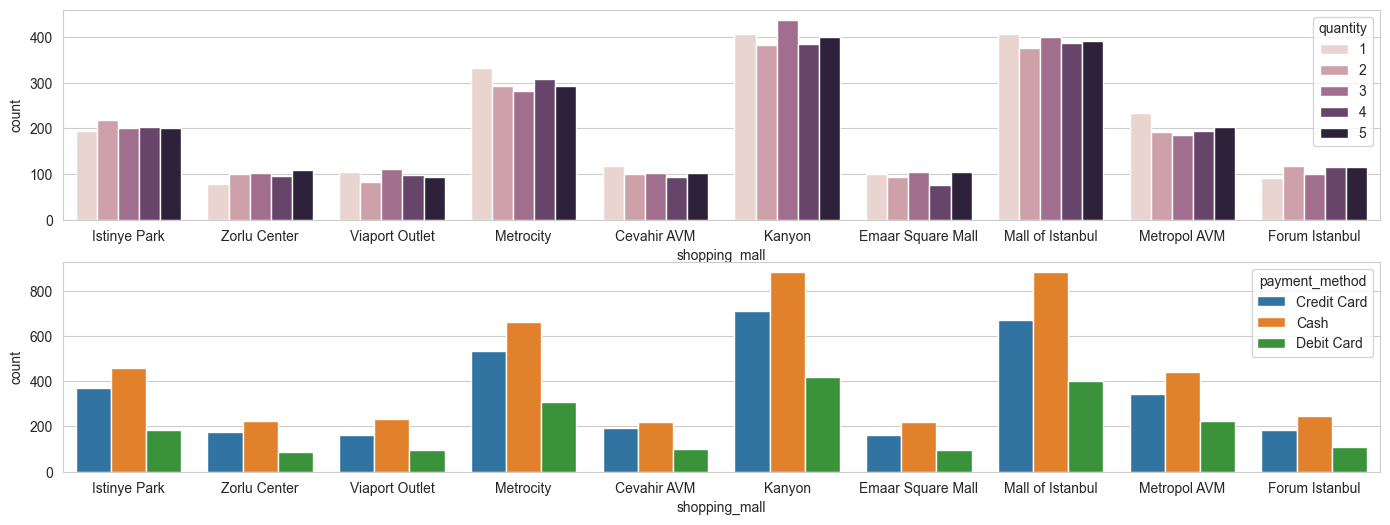

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(17,6))
sns.countplot(data=dfc, x="shopping_mall", hue='quantity', ax=axes[0]),
sns.countplot(data=dfc, x="shopping_mall", hue='payment_method', ax=axes[1])

plt.show()

### Total quantity of sales per category across all shopping mall over 3 years

In [26]:
total_sales_per_cat = pd.DataFrame(dfc.groupby(['category'])['quantity'].sum().reset_index())
total_sales_per_cat

,category,quantity
0,Books,1506
1,Clothing,10320
2,Cosmetics,4444
3,Food & Beverage,4422
4,Shoes,3118
5,Souvenir,1589
6,Technology,1445
7,Toys,3050


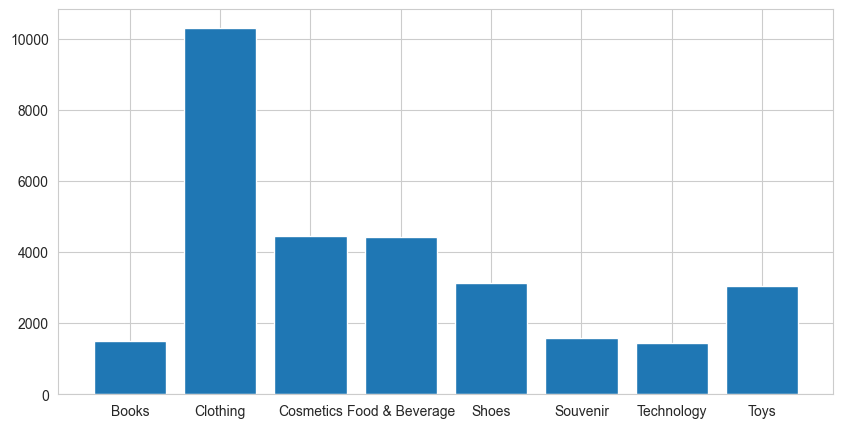

In [27]:
plt.figure(figsize=(10,5))
plt.bar(x=total_sales_per_cat['category'], height=total_sales_per_cat['quantity'])
plt.show()

### Total expenditure per category across all shopping mall over 3 years

In [28]:
total_spend_on_cat = pd.DataFrame(dfc.groupby(['category'])['price'].sum().reset_index())
total_spend_on_cat

,category,price
0,Books,22815.90
1,Clothing,3096825.60
2,Cosmetics,180693.04
3,Food & Beverage,23319.90
4,Shoes,1871330.06
5,Souvenir,18638.97
6,Technology,1517250.00
7,Toys,109312.00


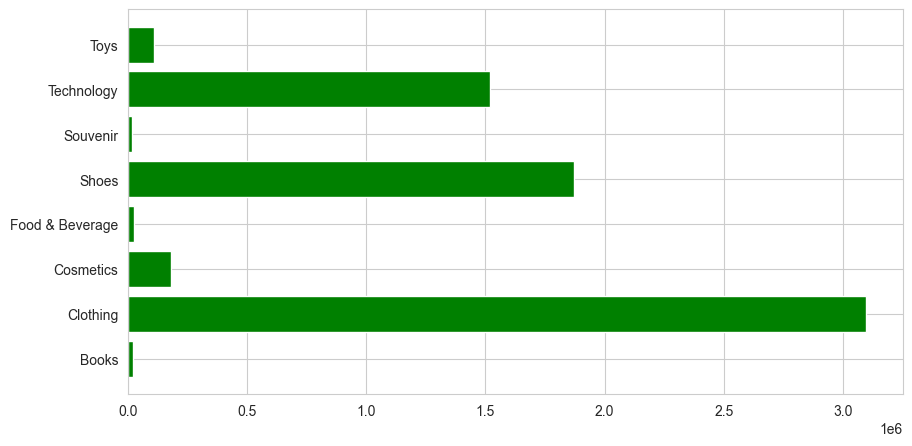

In [29]:
plt.figure(figsize=(10,5))
plt.barh(y=total_spend_on_cat['category'], width=total_spend_on_cat['price'], color='green')
plt.show()

### Merged total expenditure dataframe with total quantity dataframe

In [30]:
total_spend_per_qcat = pd.merge(total_sales_per_cat, total_spend_on_cat, on='category')
total_spend_per_qcat

,category,quantity,price
0,Books,1506,22815.90
1,Clothing,10320,3096825.60
2,Cosmetics,4444,180693.04
3,Food & Beverage,4422,23319.90
4,Shoes,3118,1871330.06
5,Souvenir,1589,18638.97
6,Technology,1445,1517250.00
7,Toys,3050,109312.00


In [ ]:
# Based on Qunatity

fig = px.scatter(total_spend_per_qcat, x="category", y="quantity",
                 size="quantity",size_max=55,
                 color="category", hover_data='price'        
            )
fig.show()

In [124]:
# Based on Price

fig = px.scatter(total_spend_per_qcat, x="category", y="quantity",
                 size="price",size_max=55,
                 color="category", hover_data='price'        
            )
fig.show()

### Total sales per mall per year

In [33]:
qsale_per_mall_year = pd.DataFrame(dfc.groupby(['year','shopping_mall'])['quantity'].sum().reset_index())
qsale_per_mall_year.head()

,year,shopping_mall,quantity
0,2021,Cevahir AVM,695
1,2021,Emaar Square Mall,694
2,2021,Forum Istanbul,713
3,2021,Istinye Park,1377
4,2021,Kanyon,2842


### Total sales per shopping mall for 2021

In [34]:
sale_2021 = qsale_per_mall_year.query('year == 2021')
sale_2021

,year,shopping_mall,quantity
0,2021,Cevahir AVM,695
1,2021,Emaar Square Mall,694
2,2021,Forum Istanbul,713
3,2021,Istinye Park,1377
4,2021,Kanyon,2842
5,2021,Mall of Istanbul,2746
6,2021,Metrocity,2083
7,2021,Metropol AVM,1367
8,2021,Viaport Outlet,655
9,2021,Zorlu Center,692


### Total sales per shopping mall for 2022

In [35]:
sale_2022 = qsale_per_mall_year.query('year == 2022')
sale_2022

,year,shopping_mall,quantity
10,2022,Cevahir AVM,690
11,2022,Emaar Square Mall,622
12,2022,Forum Istanbul,792
13,2022,Istinye Park,1416
14,2022,Kanyon,2653
15,2022,Mall of Istanbul,2582
16,2022,Metrocity,1993
17,2022,Metropol AVM,1350
18,2022,Viaport Outlet,700
19,2022,Zorlu Center,691


### Total sales per shopping mall for 2023

In [36]:
sale_2023 = qsale_per_mall_year.query('year == 2023')
sale_2023

,year,shopping_mall,quantity
20,2023,Cevahir AVM,119
21,2023,Emaar Square Mall,102
22,2023,Forum Istanbul,159
23,2023,Istinye Park,253
24,2023,Kanyon,523
25,2023,Mall of Istanbul,524
26,2023,Metrocity,378
27,2023,Metropol AVM,246
28,2023,Viaport Outlet,109
29,2023,Zorlu Center,128


In [37]:
phase1 = pd.merge(sale_2021,sale_2022, on='shopping_mall')
phase1

,year_x,shopping_mall,quantity_x,year_y,quantity_y
0,2021,Cevahir AVM,695,2022,690
1,2021,Emaar Square Mall,694,2022,622
2,2021,Forum Istanbul,713,2022,792
3,2021,Istinye Park,1377,2022,1416
4,2021,Kanyon,2842,2022,2653
5,2021,Mall of Istanbul,2746,2022,2582
6,2021,Metrocity,2083,2022,1993
7,2021,Metropol AVM,1367,2022,1350
8,2021,Viaport Outlet,655,2022,700
9,2021,Zorlu Center,692,2022,691


In [38]:
phase1= phase1.rename(columns={
        'quantity_x': 'quantity_21',
        'quantity_y': 'quantity_22'
        }, inplace=False).drop(labels=['year_x','year_y'], axis=1)

In [39]:
phase2 = pd.merge(phase1,sale_2023, on='shopping_mall')

### Merged total sales per shopping mall for each year

In [40]:
sales_diff_per_mall_overyr = phase2.rename(columns={
                            'quantity': 'quantity_23'
                            }, inplace=False).drop(labels='year', axis=1)

In [41]:
sales_diff_per_mall_overyr

,shopping_mall,quantity_21,quantity_22,quantity_23
0,Cevahir AVM,695,690,119
1,Emaar Square Mall,694,622,102
2,Forum Istanbul,713,792,159
3,Istinye Park,1377,1416,253
4,Kanyon,2842,2653,523
5,Mall of Istanbul,2746,2582,524
6,Metrocity,2083,1993,378
7,Metropol AVM,1367,1350,246
8,Viaport Outlet,655,700,109
9,Zorlu Center,692,691,128


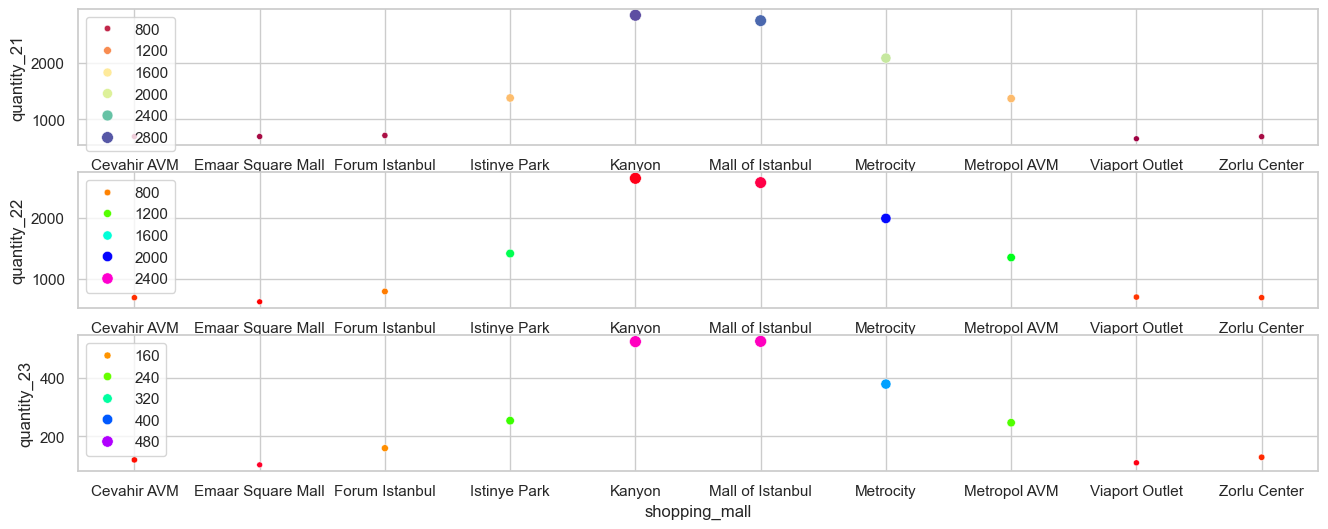

In [65]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,6))

sns.scatterplot(data=sales_diff_per_mall_overyr, x='shopping_mall', y='quantity_21', hue='quantity_21', ax=axes[0], size='quantity_21', palette='Spectral').legend(loc='upper left'),
sns.scatterplot(data=sales_diff_per_mall_overyr, x='shopping_mall', y='quantity_22', hue='quantity_22', ax=axes[1], size='quantity_22', palette='hsv').legend(loc='upper left'),
sns.scatterplot(data=sales_diff_per_mall_overyr, x='shopping_mall', y='quantity_23', hue='quantity_23', ax=axes[2], size='quantity_23', palette='gist_rainbow').legend(loc='upper left')

plt.show()

### Total customer per shopping mall

In [43]:
total_cust_per_mall = pd.DataFrame(df.groupby(['shopping_mall'])['gender'].count().reset_index())
total_cust_per_mall

,shopping_mall,gender
0,Cevahir AVM,4989
1,Emaar Square Mall,4809
2,Forum Istanbul,4946
3,Istinye Park,9779
4,Kanyon,19819
5,Mall of Istanbul,19936
6,Metrocity,15006
7,Metropol AVM,10152
8,Viaport Outlet,4914
9,Zorlu Center,5072


Text(0.5, 0, 'shopping_mall')

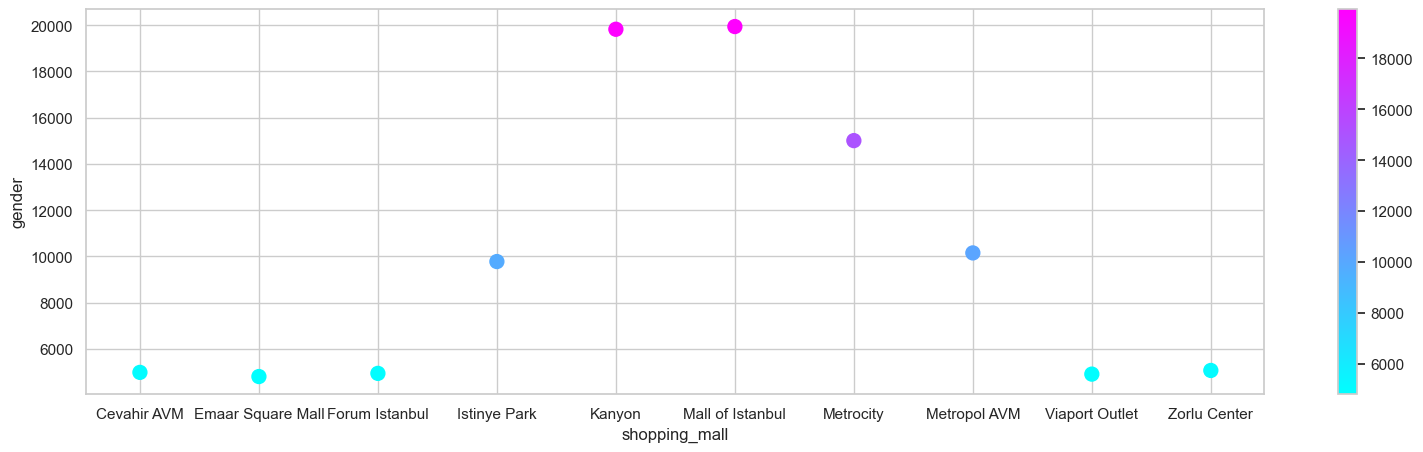

In [44]:
plt.figure(figsize=(19,5))
x, y = 'shopping_mall','gender'
plt.scatter (data=total_cust_per_mall, x=x, y=y, c=y, cmap="cool", s=100)
plt.colorbar()
plt.ylabel(y)
plt.xlabel(x)

In [45]:
fig = px.bar(total_cust_per_mall, x='shopping_mall', y='gender')
fig.show()

### Average price per quantity of category per month for 3 years combined

In [117]:
avg_prc_qcat_mon = dfc.groupby(['month','category']).agg({'quantity':'mean', 'price':'mean'}).reset_index()
avg_prc_qcat_mon

,month,category,quantity,price
0,April,Books,3.260870,49.402174
1,April,Clothing,2.981618,894.723824
2,April,Cosmetics,2.907692,118.226769
3,April,Food & Beverage,2.877698,15.050360
4,April,Shoes,2.878049,1727.318537
...,...,...,...,...
91,September,Food & Beverage,2.920000,15.271600
92,September,Shoes,3.023529,1814.631647
93,September,Souvenir,2.833333,33.235000
94,September,Technology,2.820513,2961.538462


In [125]:
fig = px.scatter(avg_prc_qcat_mon, x="category", y="price", 
                 animation_frame="month", 
                 size="quantity",
                 color="category"
            )
fig.show()

### Total sales per category by age group and gender

In [87]:
tspend_by_age_on_cat = pd.DataFrame(dfc.groupby(['age','gender','category'])['price'].sum().reset_index())
tspend_by_age_on_cat

,age,gender,category,price
0,18,Female,Books,454.50
1,18,Female,Clothing,26106.96
2,18,Female,Cosmetics,1911.02
3,18,Female,Food & Beverage,203.97
4,18,Female,Shoes,22206.29
...,...,...,...,...
823,69,Male,Food & Beverage,26.15
824,69,Male,Shoes,9602.72
825,69,Male,Souvenir,246.33
826,69,Male,Technology,11550.00


### Average sales per category by age group and gender

In [89]:
aspend_by_age_on_cat = pd.DataFrame(dfc.groupby(['age','gender','category'])['price'].mean().reset_index())
aspend_by_age_on_cat

,age,gender,category,price
0,18,Female,Books,41.318182
1,18,Female,Clothing,842.160000
2,18,Female,Cosmetics,127.401333
3,18,Female,Food & Beverage,15.690000
4,18,Female,Shoes,1708.176154
...,...,...,...,...
823,69,Male,Food & Beverage,13.075000
824,69,Male,Shoes,2400.680000
825,69,Male,Souvenir,35.190000
826,69,Male,Technology,2887.500000


In [121]:
#fig, axes = plt.subplots(figsize=(11,11))
fig = px.box(tspend_by_age_on_cat, x='category', y='price', points='all', facet_col='gender', animation_frame='age', title='Total sales per category by age group and gender')
fig1 = px.box(aspend_by_age_on_cat, x='category', y='price', points='all', facet_col='gender', animation_frame='age', title='Average sales per category by age group and gender')
fig.show()
fig1.show()

In [48]:
sales_per_agegrp = pd.DataFrame(dfc.groupby(['age'])['price'].mean().reset_index())
sales_per_agegrp.head()

,age,price
0,18,602.636387
1,19,646.135459
2,20,686.768012
3,21,681.200314
4,22,651.862970


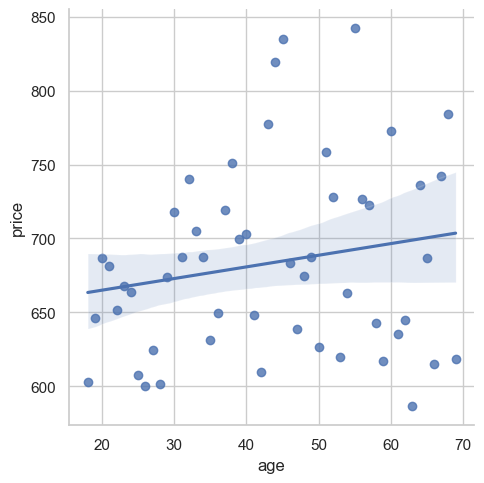

In [63]:
sns.lmplot(data=sales_per_agegrp,  x="age", y="price")
plt.show()